<a href="https://colab.research.google.com/github/Ahmedtambal/Financial-inclusion-in-Africa-/blob/main/Financial_inclusion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all of our tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

Path of the data from Google Drive



In [ ]:
Train_data = '/content/drive/MyDrive/Financial Inclusion/Train /Train.csv'
Test_data = '/content/drive/MyDrive/Financial Inclusion/Test/Test.csv'

Loading the data

In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/Financial Inclusion/Train /Train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/Financial Inclusion/Test/Test.csv')
Train_data.shape

(23524, 13)

Data preprocessing
# convert categorical features to numerical features using a function and get_dummies

In [ ]:

def bank_account_num(x):
    if x=="Yes":
        return 1
    else:
        return 0
def gender_num(x):
    if x=="Male":
        return 1
    else:
        return 0

def location_num(x):
    if x=="Urban":
        return 1
    else:
        return 0

def phone_num(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [ ]:
Train_data['bank_account']=Train_data['bank_account'].apply(lambda x:bank_account_num(x))
Train_data['gender_of_respondent']=Train_data['gender_of_respondent'].apply(lambda x:gender_num(x))
Train_data['location_type']=Train_data['location_type'].apply(lambda x:location_num(x))
Train_data['cellphone_access']=Train_data['cellphone_access'].apply(lambda x:phone_num(x))
maxi=max(Train_data['age_of_respondent'])
Train_data['age_of_respondent']=Train_data['age_of_respondent'].apply(lambda x:x/maxi)
maxi=max(Train_data['household_size'])
Train_data['household_size']=Train_data['household_size'].apply(lambda x:x/maxi)

In [ ]:
Train_data = pd.get_dummies(Train_data, columns=['relationship_with_head'], prefix = ['R.W.H'])
Train_data = pd.get_dummies(Train_data, columns=['year'], prefix = ['Y'])
Train_data = pd.get_dummies(Train_data, columns=['marital_status'], prefix = ['MS'])
Train_data = pd.get_dummies(Train_data, columns=['education_level'], prefix = ['EL'])
Train_data = pd.get_dummies(Train_data, columns=['job_type'], prefix = ['JT'])
Train_data = pd.get_dummies(Train_data, columns=['country'], prefix = ['C'])


In [ ]:
Test_data['gender_of_respondent']=Test_data['gender_of_respondent'].apply(lambda x:gender_num(x))
Test_data['location_type']=Test_data['location_type'].apply(lambda x:location_num(x))
Test_data['cellphone_access']=Test_data['cellphone_access'].apply(lambda x:phone_num(x))

In [ ]:
maxi=max(Test_data['age_of_respondent'])
Test_data['age_of_respondent']=Test_data['age_of_respondent'].apply(lambda x:x/maxi)
maxi=max(Test_data['household_size'])
Test_data['household_size']=Test_data['household_size'].apply(lambda x:x/maxi)

In [ ]:
Test_data = pd.get_dummies(Test_data, columns=['relationship_with_head'], prefix = ['R.W.H'])
Test_data = pd.get_dummies(Test_data, columns=['year'], prefix = ['Y'])
Test_data = pd.get_dummies(Test_data, columns=['marital_status'], prefix = ['MS'])
Test_data = pd.get_dummies(Test_data, columns=['education_level'], prefix = ['EL'])
Test_data = pd.get_dummies(Test_data, columns=['job_type'], prefix = ['JT'])
Test_data_y = Test_data
Test_data = pd.get_dummies(Test_data, columns=['country'], prefix = ['C'])

#Data Exploration (exploratory data analysis or EDA)

In [ ]:
Train_data.head()

,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,R.W.H_Child,R.W.H_Head of Household,R.W.H_Other non-relatives,R.W.H_Other relative,R.W.H_Parent,R.W.H_Spouse,Y_2016,Y_2017,Y_2018,MS_Divorced/Seperated,MS_Dont know,MS_Married/Living together,MS_Single/Never Married,MS_Widowed,EL_No formal education,EL_Other/Dont know/RTA,EL_Primary education,EL_Secondary education,EL_Tertiary education,EL_Vocational/Specialised training,JT_Dont Know/Refuse to answer,JT_Farming and Fishing,JT_Formally employed Government,JT_Formally employed Private,JT_Government Dependent,JT_Informally employed,JT_No Income,JT_Other Income,JT_Remittance Dependent,JT_Self employed,C_Kenya,C_Rwanda,C_Tanzania,C_Uganda
0,uniqueid_1,1,0,1,0.142857,0.24,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,uniqueid_2,0,0,0,0.238095,0.70,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,uniqueid_3,1,1,1,0.238095,0.26,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,uniqueid_4,0,0,1,0.238095,0.34,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,uniqueid_5,0,1,0,0.380952,0.26,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
Test_data.head()

,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,R.W.H_Child,R.W.H_Head of Household,R.W.H_Other non-relatives,R.W.H_Other relative,R.W.H_Parent,R.W.H_Spouse,Y_2016,Y_2017,Y_2018,MS_Divorced/Seperated,MS_Dont know,MS_Married/Living together,MS_Single/Never Married,MS_Widowed,EL_No formal education,EL_Other/Dont know/RTA,EL_Primary education,EL_Secondary education,EL_Tertiary education,EL_Vocational/Specialised training,JT_Dont Know/Refuse to answer,JT_Farming and Fishing,JT_Formally employed Government,JT_Formally employed Private,JT_Government Dependent,JT_Informally employed,JT_No Income,JT_Other Income,JT_Remittance Dependent,JT_Self employed,C_Kenya,C_Rwanda,C_Tanzania,C_Uganda
0,uniqueid_6056,1,1,0.15,0.30,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,uniqueid_6060,1,1,0.35,0.51,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,uniqueid_6065,0,0,0.15,0.77,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,uniqueid_6072,0,0,0.30,0.39,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,uniqueid_6073,1,0,0.15,0.16,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Let's see how many (1) and (0) samples we have in our dataframe
Train_data.bank_account.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

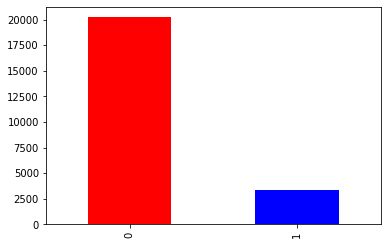

In [ ]:
Train_data.bank_account.value_counts().plot(kind="bar", color=["red", "blue"]);

In [ ]:
# Making sure our Table has not missing Values
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uniqueid                            23524 non-null  object 
 1   bank_account                        23524 non-null  int64  
 2   location_type                       23524 non-null  int64  
 3   cellphone_access                    23524 non-null  int64  
 4   household_size                      23524 non-null  float64
 5   age_of_respondent                   23524 non-null  float64
 6   gender_of_respondent                23524 non-null  int64  
 7   R.W.H_Child                         23524 non-null  uint8  
 8   R.W.H_Head of Household             23524 non-null  uint8  
 9   R.W.H_Other non-relatives           23524 non-null  uint8  
 10  R.W.H_Other relative                23524 non-null  uint8  
 11  R.W.H_Parent                        23524

In [ ]:
# Gender comparison
Train_data.gender_of_respondent.value_counts()

0    13877
1     9647
Name: gender_of_respondent, dtype: int64

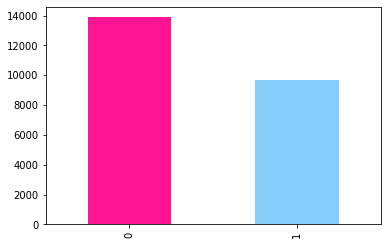

In [ ]:
Train_data.gender_of_respondent.value_counts().plot(kind="bar", color=["deeppink", "lightskyblue"]);

In [ ]:
# Compare bank_account column with gender_of_respondent column
pd.crosstab(Train_data.bank_account , Train_data.gender_of_respondent)

gender_of_respondent,0,1
bank_account,,
0,12395,7817
1,1482,1830


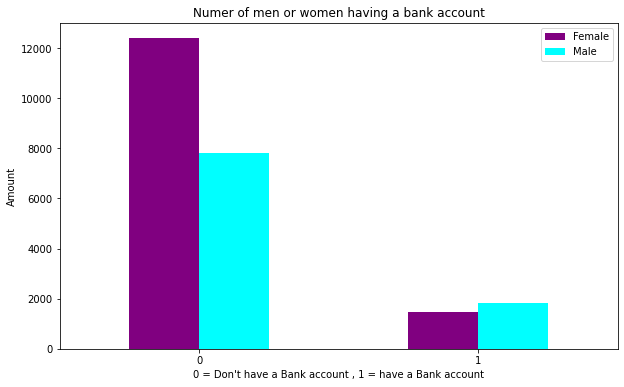

In [ ]:
# Create a plot
pd.crosstab(Train_data.bank_account, Train_data.gender_of_respondent).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["purple", "cyan"]);

# Add some attributes to it
plt.title("Numer of men or women having a bank account")
plt.xlabel("0 = Don't have a Bank account , 1 = have a Bank account")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


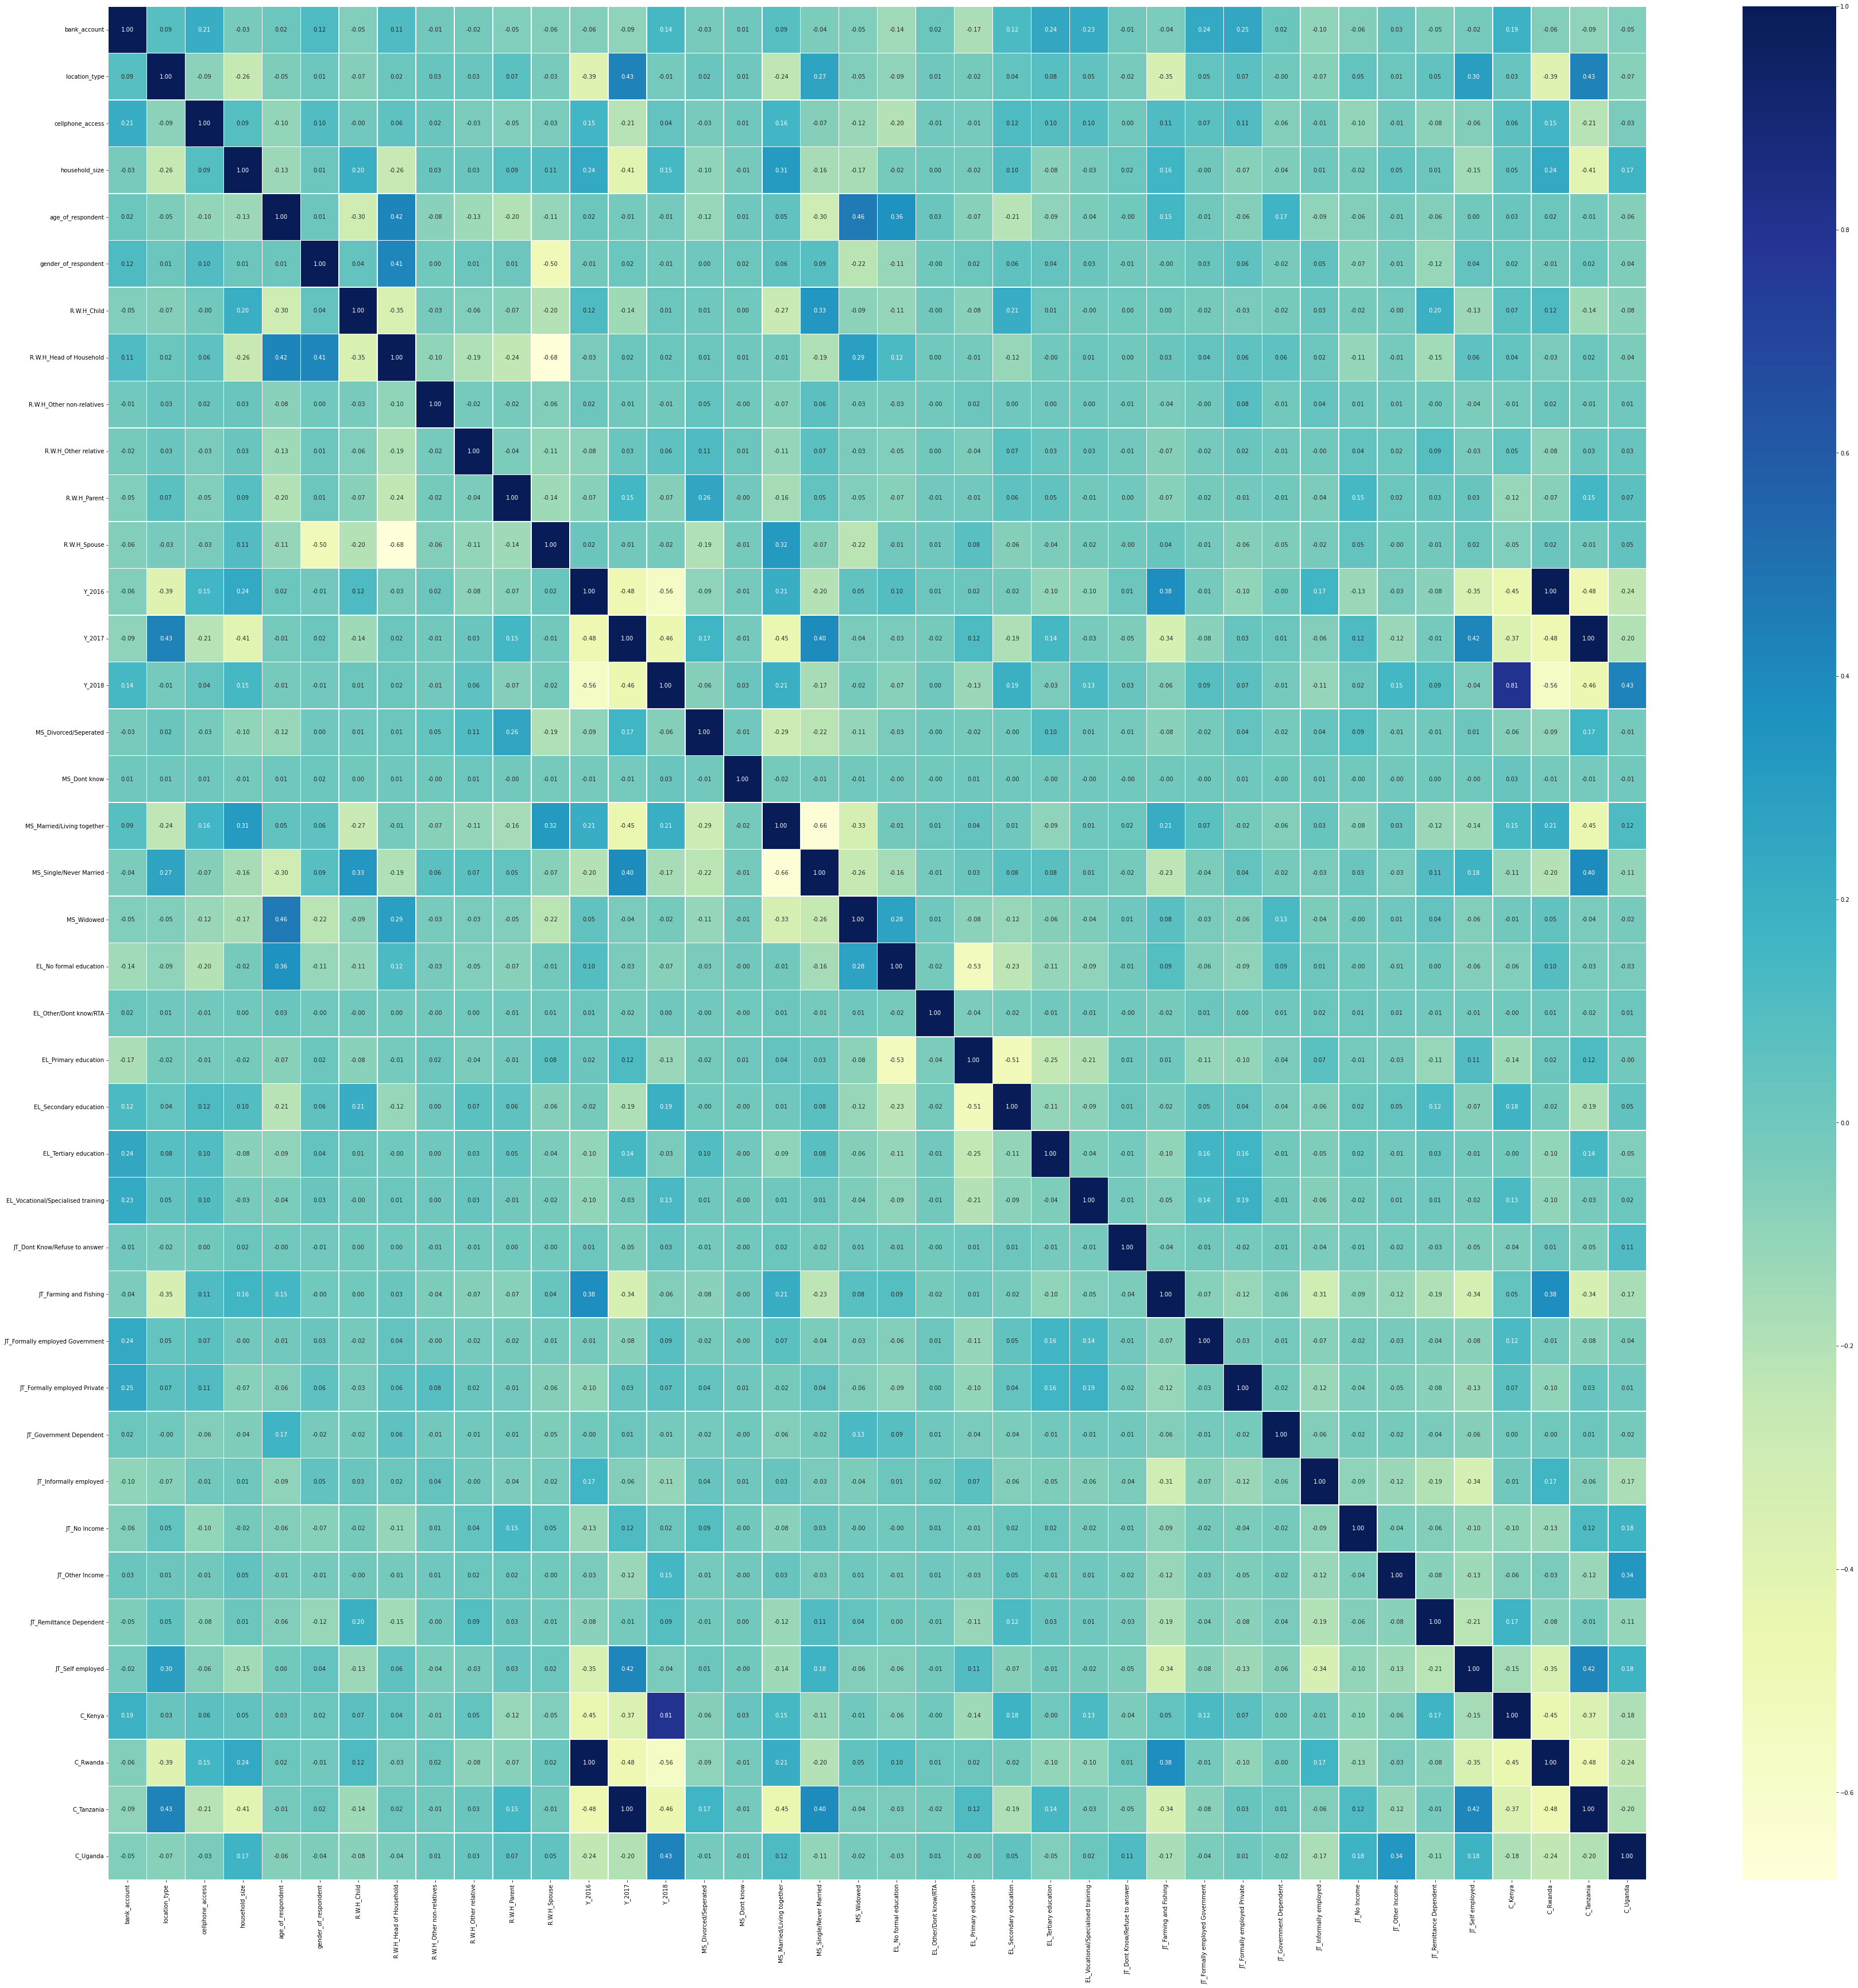

In [ ]:
corr_matrix = Train_data.corr()
plt.figure(figsize=(60,60))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

#Modeling

We're trying to predict our bank_account using variables all of the other variables.

To do this, we'll split the bank_account and uniqueid variables from the rest.


In [ ]:
# Everything except bank_account variable
X = Train_data.drop(['uniqueid','bank_account'],axis=1)

# bank_account variable
y = Train_data.bank_account.values

X_testt =Test_data.drop(['uniqueid'], axis=1)


Training and test split

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_test, y_Train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)


Using Xgboost for our Model

In [ ]:
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

# fit and Evaluate model
my_model3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.5, colsample_bytree = 0.5, max_depth = 5)
my_model3.fit(X_Train, y_Train)
y_pred = my_model3.predict(X_test)

# Get error rate
print("Error rate of XGBOOST: ", 1 - accuracy_score(y_test, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_test)

Error rate of Random Forest classifier:  0.11263814111646364


array([[5894,  625],
       [ 170,  369]])

In [ ]:
Test_data.bank_account = my_model3.predict(X_testt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



preparing our submission file

In [ ]:
LX=list(Test_data_y['country'])
LY=list(Test_data_y['uniqueid'])

In [ ]:
LX_LY=[]
for i in range(len(LX)):
    LX_LY.append(LY[i]+" x "+LX[i])


In [ ]:
dx = {"unique_id":LX_LY,'bank_account': Test_data.bank_account}

SubmissionFile=pd.DataFrame(data=dx)

In [ ]:
SubmissionFile.to_csv(r'/content/drive/MyDrive/SubmissionFile11474.csv', index = False)